# Discussion 07 - Non-Linear SVM, Decision Trees

## Goals

- Dual Form of SVM
- Non-linear SVM
    - Kernel Trick
- Decision Trees
    - ID3 Algorithm
    - Pruning
        
Instructor : Bharath Kinnal

## Dual Form of SVM

The primal form of SVM problem is a minimization of the weights $w$ as follows :

$$\begin{align*}
    \text{minimize } & \frac{1}{2} ||w||^2 + C \sum_{i=1}^n \max \left( 0,(1 - y_i \cdot (w^{T}x_i + b))\right)& \\
    \text{such that, }& y_{n}(w^{T}x_n + b) \geq 1 \qquad \forall n
\end{align*}$$

Here, it can be seen that $w$ represents the weights of the input features, and $C$ denotes the inverse of the strength of regularization.

It can be seen that the the solution $w$ can always be written as a linear combination of the training data, as shown below:
$$w = \sum^{N}_{j=1} \alpha_j y_j x_j$$
where $\alpha_j$ is the weight associated with the training data $x_j$.

Hence, the dual form can be represented as follows :

$$\begin{align*}
    \text{maximize} & \sum_{i} \alpha_i − \frac{1}{2}\sum_{jk} \alpha_j \alpha_k y_j y_k (x_j^T x_k) \\
    \text{subject to, } & 0 \le \alpha_i \le C \quad \forall i \\
    \text{and, } & \sum_{i}\alpha_i y_i=0
\end{align*}$$




## Non-linear SVM

The main objective of an SVM is to find an optimal hyperplane that separates two groups of points. In order for SVM to classify non-linear data, we can define a transformation function $\phi$, such that for a non-linear input dataset $X$, the transformation $\phi(X)$ will be linear. However, sometimes the feature space of the input data $X$ can have many dimensions, or even have infinite dimensions. In this case, calculating $\phi(X)$ is very inefficient and even impossible.

In [15]:
from IPython.display import Image
Image(url = 'https://www.aionlinecourse.com/uploads/tutorials/2019/07/11_21_kernel_svm_3.png')

### Kernel Trick
Kernels are similarity functions that return inner products between the images of data points. Kernels can often be computed efficiently even for very high dimensional spaces. Choosing a kernel $K$ is equivalent to choosing the transformation function $\phi$, and the transformed feature space is implicitly defined by $K$.

$$K : X \times X \rightarrow R$$
$$K(x_i, x_j) = \phi(x_i)^T \cdot \phi(x_j)$$

The kernel trick involves defining a kernel function K, and replace the dot product of 2 input vectors $x_i$ and $x_j$ in the dual form of the SVM problem, with a kernel function $K(x_i,x_j)$ in both training and testing. This is useful since we don't need to know what the transformation function $\phi$ is, and what the feature space is. Furthermore, there is no need to explicitly map the data to the feature space.

Hence, the non-linear SVM problem can be defined as finding the weights associated with each training data as follows :
$$\begin{align*}
    \text{maximize} & \sum_{i} \alpha_i − \frac{1}{2}\sum_{jk} \alpha_j \alpha_k y_j y_k K(x_j, x_k) \\
    \text{subject to, } & 0 \le \alpha_i \le C \quad \forall i \\
    \text{and, } & \sum_{i}\alpha_i y_i=0
\end{align*}$$
<!-- $$\text{maximize}  \sum_{i} \alpha_i − \frac{1}{2}\sum_{jk} \alpha_j \alpha_k y_j y_k K(x_j, x_k)$$ -->

#### Kernel Functions
We can define any number of kernel functions to find the similarities between any two input vectors $x_1$ and $x_2$. Some popular kernel functions are given below :
- Linear : $K_L(x_1, x_2) = x_1^T \cdot x_2$
- Polynomial : $K_P(x_1, x_2) = (a + x_1^T \cdot x_2)^b$, where $b$ is the degree of the kernel, and $a$ is an integer constant
- Radial Basis Function (RBF) : RBF kernel is a function whose value depends on the distance from the origin or from some point. It is defined as $K_{RBF}(x_1, x_2) = e^{\lambda ||x_1 - x_2||^2}$, where $||x_1 — x_2||$ is the Euclidean distance between $x_1$ and $x_2$

In [159]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

iris_data = load_iris()
X = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
Y = iris_data.target

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(X)

# Taking only Petal length and Petal width
X = X[:,2:]

In [160]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [161]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

#clf = SVC(kernel='rbf', gamma = 5.0, decision_function_shape='ovo')
clf = SVC(kernel='linear', decision_function_shape='ovo')

clf.fit(X_train, y_train)

print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.94      1.00      0.97        16
           2       1.00      0.89      0.94         9

    accuracy                           0.97        38
   macro avg       0.98      0.96      0.97        38
weighted avg       0.98      0.97      0.97        38



2


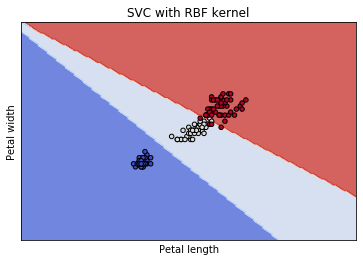

In [162]:
print(X.shape[1])
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# title for the plots
title = 'SVC with RBF kernel'

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(1, 1)
#plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

#for ax in sub:
plot_contours(sub, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
sub.scatter(X0, X1, c=Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
sub.set_xlim(xx.min(), xx.max())
sub.set_ylim(yy.min(), yy.max())
sub.set_xlabel('Petal length')
sub.set_ylabel('Petal width')
sub.set_xticks(())
sub.set_yticks(())
sub.set_title(title)

plt.show()

## Decision Trees

Decision tree analysis is a predictive modelling tool that can be applied across many areas. Decision trees can be constructed by an algorithmic approach that can split the dataset in different ways based on different conditions. The two main entities of a tree are decision nodes, where the data is split, and leaves, where we got outcome.

Decision Tree algorithms can be used for classification or regression predictive modeling problems. 
- __Classification decision trees :__ The decision variable is categorical. 
- __Regression decision trees :__ The decision variable is continuous.

Many algorithms can be used to develop a decision tree. We are going to mainly talk about the ID3 algorithm.

In [111]:
Image(url = 'https://miro.medium.com/max/3000/1*YFD1iTIh2LONT3Tlyn_gZA.png')

### ID3 Algorithm

ID3 decision trees use a greedy search approach to determine decision node selection, meaning that it picks an ideal attribute once and does not reconsider or modify its previous choices. ID3 algorithms use entropy and information gain to determine which attributes best split the data.

In other words: if an attribute perfectly classifies the set of data then ID3 training stops; otherwise, it recursively iterates over the n number of subsets of data for that attribute until the subset becomes pure. For this reason, the process of decision node selection is fundamental in constructing an ID3 algorithm.

#### Entropy<!-- , and Gini Index -->

Entropy is a measure of uncertainty in a dataset. It is the measure of purity of a node in a decision tree. The value of entropy of a node lies between 0 and 1.
- Entropy is 0 if the sample in a node is completely homogeneous in terms of the class label.
- Entropy is 1 if the sample in a node is equally divided

<!-- Entropy can be calculated as follows :
$$\text{Entropy, }H = -\sum_{i=1}^{c} p_i log_2 p_i$$
 -->
Entropy over a given feature $x$ is given by :
$$H(x) = -\sum_{i \in value(x)} p_i log_2 p_i$$

In [163]:
import pandas as pd
import numpy as np

df = pd.read_csv("decision_tree_sample_dataset.csv", header=0)
df.head()

,PlayTennis,Outlook,Temperature,Humidity,Wind
0,No,Sunny,Hot,High,Weak
1,No,Sunny,Hot,High,Strong
2,Yes,Overcast,Hot,High,Weak
3,Yes,Rain,Mild,High,Weak
4,Yes,Rain,Cool,Normal,Weak


In [115]:
X = df.drop(columns = ['PlayTennis'])
y = df['PlayTennis']

In [3]:
def entropy(attribute_column):
    # find unique values and their frequency counts for the given attribute
    values, counts = np.unique(attribute_column, return_counts=True)
    print(counts)

    # calculate entropy for each unique value
    entropy_list = []

    for i in range(len(values)):
        probability = counts[i]/np.sum(counts)
        entropy_list.append(-probability*np.log2(probability))

    # calculate sum of individual entropy values
    total_entropy = np.sum(entropy_list)

    return total_entropy

In [4]:
for x in X :
    print(entropy(X[x]))

print(entropy(y))

[4 5 5]
1.5774062828523454
[4 4 6]
1.5566567074628228
[7 7]
1.0
[6 8]
0.9852281360342515
[5 9]
0.9402859586706311


#### Information Gain
Information Gain is a measure of the decrease in uncertainty obtained by splitting a dataset based on some additional attribute. Information Gain of a particular feature is calculated as follows :

$$\text{Information Gain, }G(\text{feature}) = H(\text{dataset}) - H(\text{feature})$$

$$G(\text{feature}) = H(\text{dataset}) - \sum_{i \in value(\text{feature})}\frac{n_i}{n} H(i)$$

In [5]:
def information_gain(data, feature_attribute_name, target_attribute_name):
        # find total entropy of given subset
        total_entropy = entropy(data[target_attribute_name])

        # find unique values and their frequency counts for the attribute to be split
        values, counts = np.unique(data[feature_attribute_name], return_counts=True)

        # calculate weighted entropy of subset
        weighted_entropy_list = []

        for i in range(len(values)):
            subset_probability = counts[i]/np.sum(counts)
            subset_entropy = entropy(data.where(data[feature_attribute_name]==values[i]).dropna()[target_attribute_name])
            weighted_entropy_list.append(subset_probability*subset_entropy)

        total_weighted_entropy = np.sum(weighted_entropy_list)

        # calculate information gain
        information_gain = total_entropy - total_weighted_entropy

        return information_gain


In [6]:
for x in X :
    print(information_gain(df, x,'PlayTennis'))

[5 9]
[4]
[2 3]
[3 2]
0.24674981977443933
[5 9]
[1 3]
[2 2]
[2 4]
0.02922256565895487
[5 9]
[4 3]
[1 6]
0.15183550136234159
[5 9]
[3 3]
[2 6]
0.04812703040826949


In [116]:
from sklearn.preprocessing import LabelEncoder

#set_of_classes = X.value_counts().index.tolist()

#print(set_of_classes)

enc = LabelEncoder()

for x in X :
    enc.fit(X[x])
    list(enc.classes_)
    X[x] = enc.transform(X[x])

X

,Outlook,Temperature,Humidity,Wind
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1
5,1,0,1,0
6,0,0,1,0
7,2,2,0,1
8,2,0,1,1
9,1,2,1,1


In [150]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model=DecisionTreeClassifier(criterion='entropy', splitter='best', random_state = 0)

In [151]:
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [152]:
y_pred=model.predict(X_test)



In [153]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[1 0]
 [1 1]]
Classification Report:
              precision    recall  f1-score   support

          No       0.50      1.00      0.67         1
         Yes       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3

Accuracy: 0.6666666666666666


In [154]:
import sys
!{sys.executable} -m pip install pydotplus pydot graphviz
# !sudo apt-get install graphviz

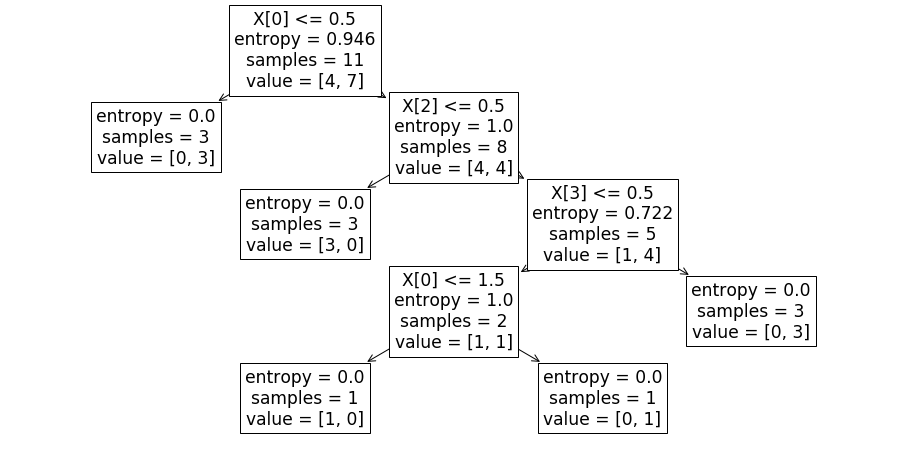

In [155]:
plt.figure(figsize=(16,8))
tree.plot_tree(model)
plt.show()

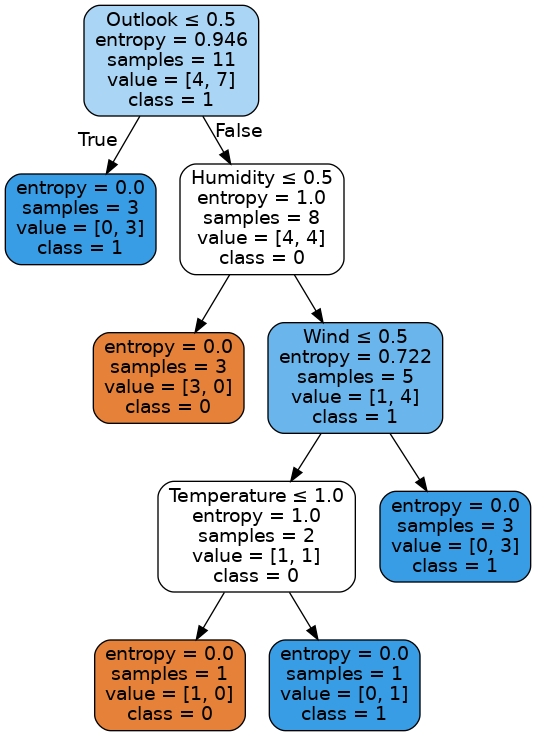

In [133]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,
      filled=True, rounded=True,
      special_characters=True,feature_names = X.columns, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
#print(type(graph))
graph.write_png('playTennis.png')

Image(graph.create_png())

### Pruning

Decision trees are prone to overfitting as the algorithm continues to split nodes into sub-nodes till each node becomes homogeneous. The accuracy of training data is much higher when compared to the test set, hence decision trees should be pruned to prevent the model from overfitting. 

Pruning can be achieved by controlling the depth of the tree, maximum/minimum number of samples in each node, minimum impurity gain for a node to split, and the maximum leaf nodes. There are 2 main types of pruning :
- __Pre-pruning :__ This technique is used before construction of decision tree. Pre-Pruning can be done using __hyperparameter tuning__.
- __Post-pruning :__ This technique is used after construction of decision tree. This technique is used when decision tree will have very large depth and will show overfitting of model. It is also known as backward pruning. 

<!-- If you use the `DecisionTreeClassifier()` in the `sklearn` library to develop a decision tree classifier, the hyperparameters relating to the branching of the decision tree, i.e., max_depth and min_samples_split, can be using the method  `cost_complexity_pruning_path()`. -->

<!-- print(dir(type(model)))
path = model.cost_complexity_pruning_path(X_train, y_train) -->

<!-- The Gini index is a cost function used to evaluate splits in the dataset. A Gini score gives an idea of how good a split is by how mixed the classes are in the two groups created by the split. In a binary split, a perfect separation results in a Gini score of 0, whereas the worst case split that results in 50/50 classes in each group result in a Gini score of 0.5. -->

### 